# **Financial Modeling Case Study**

- Laura Weil - 53012

## **1.1. Importing the Data**

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import yfinance as yfin
from pandas_datareader import data as pdr

# Initialize Yahoo Finance
yfin.pdr_override()

# Define time range
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

# Get data
spx = pdr.get_data_yahoo('SPY', start, end)
gld = pdr.get_data_yahoo('GLD', start, end)

# Define columns
columns = [
    'Date', 'Close_Price',
    'Bid1_Price', 'Bid1_Quantity',
    'Bid2_Price', 'Bid2_Quantity',
    'Bid3_Price', 'Bid3_Quantity',
    'Ask1_Price', 'Ask1_Quantity',
    'Ask2_Price', 'Ask2_Quantity',
    'Ask3_Price', 'Ask3_Quantity'
]

# Create empty lists to store rows for each order book
spx_order_book_rows = []
gld_order_book_rows = []

# Helper function to create a single day's order book
def create_order_book_row(date, close_price):
    bid1_price = close_price - np.random.uniform(0.05, 3)
    bid2_price = bid1_price - np.random.uniform(0.05, 3)
    bid3_price = bid2_price - np.random.uniform(0.05, 3)
    ask1_price = close_price + np.random.uniform(0.05, 3)
    ask2_price = ask1_price + np.random.uniform(0.05, 3)
    ask3_price = ask2_price + np.random.uniform(0.05, 3)
    bid1_quantity = np.random.randint(1, 10000)
    bid2_quantity = np.random.randint(1, 10000)
    bid3_quantity = np.random.randint(1, 10000)
    ask1_quantity = np.random.randint(1, 10000)
    ask2_quantity = np.random.randint(1, 10000)
    ask3_quantity = np.random.randint(1, 10000)

    return {
        'Date': date,
        'Close_Price': close_price,
        'Bid1_Price': bid1_price,
        'Bid1_Quantity': bid1_quantity,
        'Bid2_Price': bid2_price,
        'Bid2_Quantity': bid2_quantity,
        'Bid3_Price': bid3_price,
        'Bid3_Quantity': bid3_quantity,
        'Ask1_Price': ask1_price,
        'Ask1_Quantity': ask1_quantity,
        'Ask2_Price': ask2_price,
        'Ask2_Quantity': ask2_quantity,
        'Ask3_Price': ask3_price,
        'Ask3_Quantity': ask3_quantity
    }

# Generate order book for SPY
for date, close_price in spx['Close'].items():
    spx_order_book_rows.append(create_order_book_row(date, close_price))

# Generate order book for GLD
for date, close_price in gld['Close'].items():
    gld_order_book_rows.append(create_order_book_row(date, close_price))

# Create DataFrames
spx_order_book_df = pd.DataFrame(spx_order_book_rows)
gld_order_book_df = pd.DataFrame(gld_order_book_rows)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## **1.2 Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_spx = spx_order_book_df.copy()
df_spx = df_spx[["Close_Price"]]
df_gld = gld_order_book_df.copy()
df_gld = df_gld[["Close_Price"]]

**Development of S&P500 Close Price**

<Axes: >

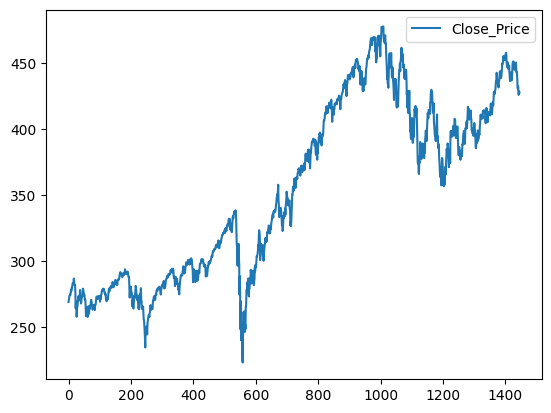

In [ ]:
df_spx.plot()

**Development of SPDR Gold Trust ETF Close Price**

<Axes: >

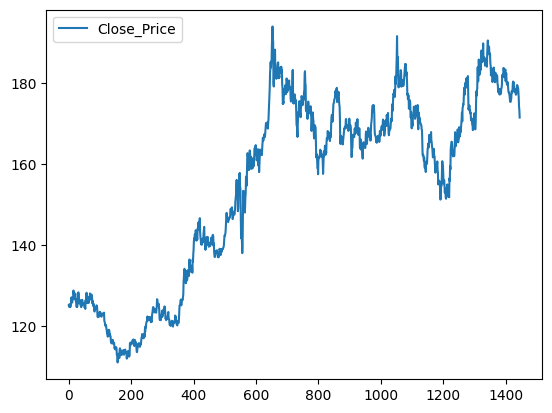

In [ ]:
df_gld.plot()

**Evaluating the Maximum Drawdown (MDD) to gauge risk of S&P500 asset**

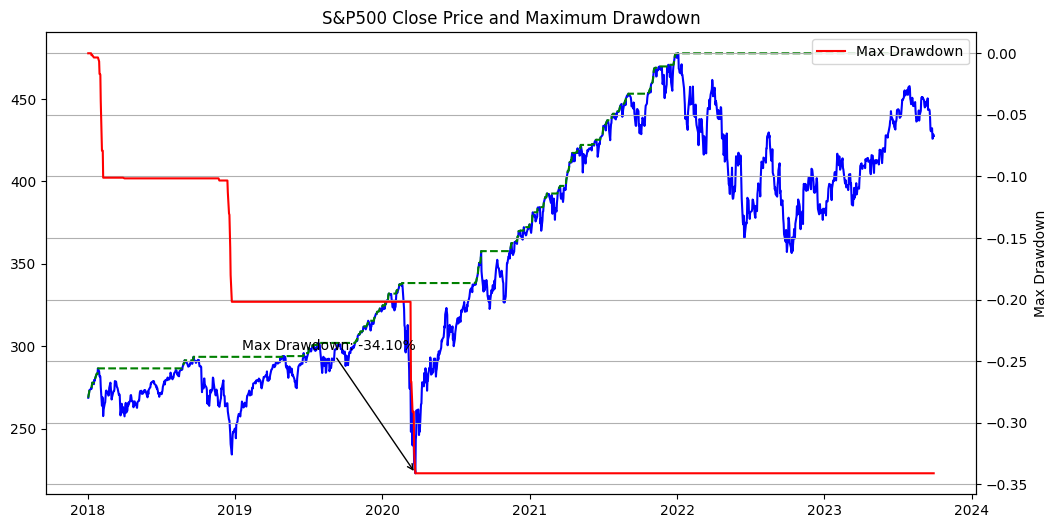

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming spx_order_book_df is your DataFrame
close_prices = spx_order_book_df['Close_Price']

# Compute running maximum
running_max = close_prices.cummax()

# Compute drawdown as the relative difference between the running max and the current value
drawdown = (close_prices - running_max) / running_max

# Compute maximum drawdown
max_drawdown = drawdown.cummin() # Notice it's cummin() since we're looking for the most negative value

# Find date and value of max drawdown
max_drawdown_date = spx_order_book_df['Date'][max_drawdown.idxmin()]
max_drawdown_value = max_drawdown.min()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(spx_order_book_df['Date'], close_prices, label='S&P500 Close Price', color='blue')
plt.plot(spx_order_book_df['Date'], running_max, label='Running Maximum', color='green', linestyle='--')
ax = plt.twinx()
ax.plot(spx_order_book_df['Date'], max_drawdown, label='Max Drawdown', color='red')

# Annotate the value of max drawdown
annotation_text = f'Max Drawdown: {max_drawdown_value*100:.2f}%'
ax.annotate(annotation_text, xy=(max_drawdown_date, max_drawdown_value),
            xytext=(max_drawdown_date, max_drawdown_value + 0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

plt.title('S&P500 Close Price and Maximum Drawdown')
ax.set_ylabel('Max Drawdown')
ax.legend()
plt.grid()
plt.show()


**Comments:** The maximum drawdown (MDD) of 34% in the S&P 500 in 2020 was a significant event, reflecting the stock market's sharp decline in response to the global COVID-19 pandemic.

**Evaluating ACF and PACF graphs**

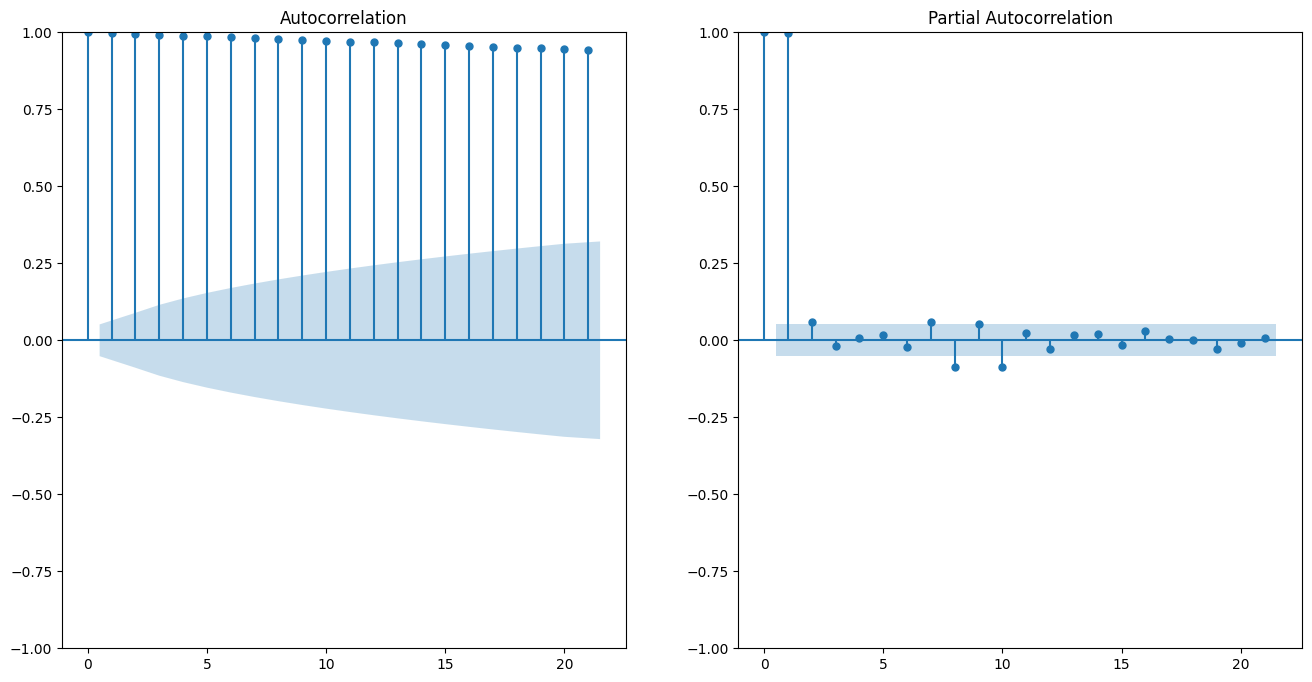

In [ ]:
import statsmodels.api as sm

# Graph data
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

fig = sm.graphics.tsa.plot_acf(df_spx.iloc[1:]['Close_Price'], lags=21, ax=axes[0]) # Assuming monthly patterns, considering the stock market is open approximately 252 days a year, we consider around 21 lags (for roughly 21 trading days a month
fig = sm.graphics.tsa.plot_pacf(df_spx.iloc[1:]['Close_Price'], lags=21, ax=axes[1])

**Comments:** A significant autocorrelation at lag 1 is indicative of "volatility clustering" – periods where stock returns are consistently above average followed by periods where returns are consistently below average. Hence, volatility is predictable to some extent

**Some overal statistics of S&P500 stock and SPDR Gold Trust ETF**

In [ ]:
df_spx.describe()

,Close_Price
count,1446.000000
mean,354.288112
std,67.708857
min,222.949997
25%,287.939995
50%,356.419998
75%,415.204994
max,477.709991


In [ ]:
df_gld.describe()

,Close_Price
count,1446.000000
mean,154.630062
std,23.145838
min,111.099998
25%,128.070007
50%,163.215004
75%,173.367496
max,193.889999


## **1.3 Rolling Correlation between US S&P500 stock and SPDR Gold Trust ETF returns**

Here we explore the historical rolling correlation between US S&P500 and Gold to establish a potential pattern, which we can factor in our trading strategy.

In [ ]:
# Ensure date columns are in datetime format
spx_order_book_df['Date'] = pd.to_datetime(spx_order_book_df['Date'])
gld_order_book_df['Date'] = pd.to_datetime(gld_order_book_df['Date'])

# Merge data on 'Date' column
merged_data = pd.merge(spx_order_book_df, gld_order_book_df, on='Date', how='inner', suffixes=('_spx', '_gld'))

In [ ]:
merged_data['SPX_Returns'] = merged_data['Close_Price_spx'].pct_change()
merged_data['GLD_Returns'] = merged_data['Close_Price_gld'].pct_change()

In [ ]:
window_length = 60  # Adjust this for your desired window size
merged_data['Rolling_Corr'] = merged_data['SPX_Returns'].rolling(window=window_length).corr(merged_data['GLD_Returns'])

In [ ]:
filtered_data = merged_data[['Date','SPX_Returns', 'GLD_Returns', 'Rolling_Corr']]

# Drop rows where 'Rolling_Corr' is NaN
filtered_data = filtered_data.dropna(subset=['Rolling_Corr'])

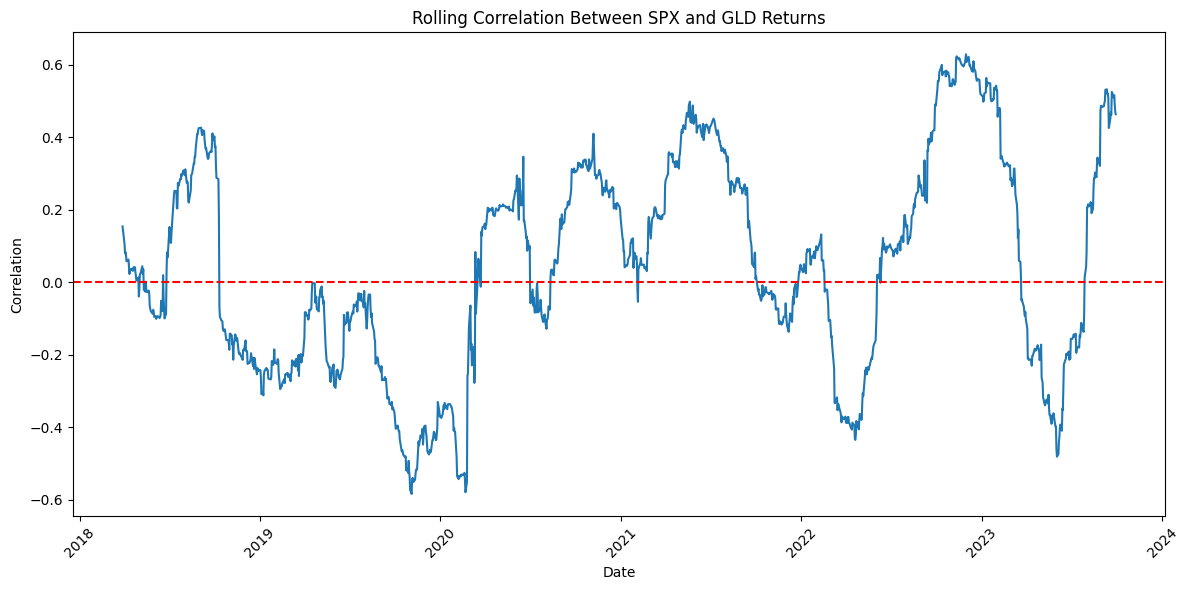

In [ ]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(filtered_data['Date'], filtered_data['Rolling_Corr'])
plt.title("Rolling Correlation Between SPX and GLD Returns")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


## **2 Trading Algorithm**

In [ ]:
class TradingStrategy:

    def __init__(self, cash: float, spx_order_book: pd.DataFrame, gld_order_book: pd.DataFrame):
        # Initial closing prices
        spx_initial_price = spx_order_book['Close_Price'].iloc[0]
        gld_initial_price = gld_order_book['Close_Price'].iloc[0]

        # Calculate the quantities to buy based on 50% cash allocation
        spx_qty = (0.5 * cash) // spx_initial_price
        gld_qty = (0.5 * cash) // gld_initial_price

        # Calculate the remaining cash after purchasing
        remaining_cash = cash - (spx_qty * spx_initial_price + gld_qty * gld_initial_price)

        # Initial Position
        self.current_position = pd.DataFrame({
            'Cash': [remaining_cash],
            'SPX Position': [spx_qty],
            'GLD Position': [gld_qty],
            'PnL': [0]  # initial PnL
        })

        # Initialize transactions DataFrame with the initial transactions
        self.transactions = pd.DataFrame({
            'Date': [spx_order_book['Date'].iloc[0], gld_order_book['Date'].iloc[0]],
            'Symbol': ['SPX', 'GLD'],
            'Signal': [1, 1],  # Both are buy signals
            'Price': [spx_initial_price, gld_initial_price],
            'Qty': [spx_qty, gld_qty]
        })

    def trading_algorithm(self, spx_order_book: pd.DataFrame, gld_order_book: pd.DataFrame) -> tuple:

        spx_order_book = spx_order_book.copy(deep=True)  # Ensure a deep copy is used
        gld_order_book = gld_order_book.copy(deep=True)

        # Compute MACD and Signal line for SPX
        short_window = 12
        long_window = 26
        signal_window = 9

        spx_order_book['12_EMA'] = spx_order_book['Close_Price'].ewm(span=short_window, adjust=False).mean()
        spx_order_book['26_EMA'] = spx_order_book['Close_Price'].ewm(span=long_window, adjust=False).mean()
        spx_order_book['MACD'] = spx_order_book['12_EMA'] - spx_order_book['26_EMA']
        spx_order_book['Signal_Line'] = spx_order_book['MACD'].ewm(span=signal_window, adjust=False).mean()

        # Compute rolling correlation between SPX and GLD returns over the past 60 trading days
        spx_returns = spx_order_book['Close_Price'].pct_change()
        gld_returns = gld_order_book['Close_Price'].pct_change()
        rolling_corr = spx_returns.rolling(window=60).corr(gld_returns)

        # Get the latest values
        spx_latest_macd = spx_order_book['MACD'].iloc[-1]
        spx_latest_signal = spx_order_book['Signal_Line'].iloc[-1]
        latest_corr = rolling_corr.iloc[-1]

        spx_latest_close = spx_order_book['Close_Price'].iloc[-1]
        gld_latest_close = gld_order_book['Close_Price'].iloc[-1]

        # Trading logic based on MACD and rolling correlation
        spx_signal, spx_qty = 0, 0
        gld_signal, gld_qty = 0, 0

        # If MACD is greater than the Signal line (potential buy signal) and the rolling correlation is negative
        if spx_latest_macd > spx_latest_signal and latest_corr < -0.2:
            spx_signal, spx_qty = 1, 10   # Buy SPX
            gld_signal, gld_qty = -1, 20  # Sell GLD

        # If MACD is less than the Signal line (potential sell signal) and the rolling correlation is negative
        elif spx_latest_macd < spx_latest_signal and latest_corr < -0.2:
            spx_signal, spx_qty = -1, 10  # Sell SPX
            gld_signal, gld_qty = 1, 20   # Buy GLD

        # If there's a considerable positive correlation
        elif latest_corr > 0.2:
            spx_signal, spx_qty = 1, 10   # Buy SPX
            gld_signal, gld_qty = -1, 20  # Sell GLD

        # Neutral scenario
        else:
            spx_signal, spx_qty = 0, 0
            gld_signal, gld_qty = 0, 0

        return (spx_signal, spx_latest_close, spx_qty, gld_signal, gld_latest_close, gld_qty)

    def execute_trades(self, spx_order_book_df, gld_order_book_df):
        for idx, date in enumerate(spx_order_book_df['Date']):
            spx_current = spx_order_book_df.iloc[:idx+1]
            gld_current = gld_order_book_df.iloc[:idx+1]

            spx_signal, spx_price, spx_qty, gld_signal, gld_price, gld_qty = self.trading_algorithm(spx_current, gld_current)

            # Update positions and cash
            new_spx_position = self.current_position['SPX Position'].values[0] + spx_signal * spx_qty
            new_gld_position = self.current_position['GLD Position'].values[0] + gld_signal * gld_qty
            new_cash = self.current_position['Cash'].values[0] - spx_signal * spx_price * spx_qty - gld_signal * gld_price * gld_qty

            # Check if the new values are negative
            if new_cash < 0 or new_spx_position < 0 or new_gld_position < 0:
                # print(f"Trade on date {date} would result in a negative value. Skipping this trade.")
                continue  # skip this iteration

            # If all validations pass, update the current position
            self.current_position['SPX Position'] = new_spx_position
            self.current_position['GLD Position'] = new_gld_position
            self.current_position['Cash'] = new_cash

            # Update transactions DataFrame
            if spx_signal != 0:
                new_transaction = pd.DataFrame({
                    'Date': [date],
                    'Symbol': ['SPX'],
                    'Signal': [spx_signal],
                    'Price': [spx_price],
                    'Qty': [spx_qty]
                })
                self.transactions = pd.concat([self.transactions, new_transaction], ignore_index=True)

            if gld_signal != 0:
                new_transaction = pd.DataFrame({
                    'Date': [date],
                    'Symbol': ['GLD'],
                    'Signal': [gld_signal],
                    'Price': [gld_price],
                    'Qty': [gld_qty]
                })
                self.transactions = pd.concat([self.transactions, new_transaction], ignore_index=True)

            # Update PnL
            spx_transactions = self.transactions[self.transactions['Symbol'] == 'SPX']
            gld_transactions = self.transactions[self.transactions['Symbol'] == 'GLD']

            spx_cost_basis = (spx_transactions['Price'] * spx_transactions['Qty'] * spx_transactions['Signal']).sum()
            gld_cost_basis = (gld_transactions['Price'] * gld_transactions['Qty'] * gld_transactions['Signal']).sum()

            spx_latest_close = spx_current['Close_Price'].iloc[-1]
            gld_latest_close = gld_current['Close_Price'].iloc[-1]

            spx_pnl = (self.current_position['SPX Position'].values[0] * spx_latest_close) - spx_cost_basis
            gld_pnl = (self.current_position['GLD Position'].values[0] * gld_latest_close) - gld_cost_basis

            # Define the data you want to append as a dictionary
            data_to_append = {
                'Date': date,
                'Cash': new_cash,
                'SPX Position': new_spx_position,
                'GLD Position': new_gld_position,
                'PnL': spx_pnl + gld_pnl,
                'SPX_PNL' : spx_pnl,
                'GLD_PNL' : gld_pnl,
            }

            # Create a new DataFrame from the data to append
            new_row = pd.DataFrame(data_to_append, index=[0])

            # Concatenate the new row with the existing DataFrame
            self.current_position = pd.concat([self.current_position, new_row], ignore_index=True)


    def get_current_position(self):
        return self.current_position.iloc[:-1]

    def get_transactions(self):
        return self.transactions

    def plot_pnl(self):
        """
        Plots the PnL, SPX_PNL, and GLD_PNL in a single graph over time.
        """
        plt.figure(figsize=(10, 6))

        # Plot PnL
        plt.plot(self.current_position['Date'], self.current_position['PnL'], label='PnL', color='green')

        # Plot SPX_PNL
        plt.plot(self.current_position['Date'], self.current_position['SPX_PNL'], label='SPX_PNL', color='blue')

        # Plot GLD_PNL
        plt.plot(self.current_position['Date'], self.current_position['GLD_PNL'], label='GLD_PNL', color='red')

        plt.title('PnL Over Time')
        plt.xlabel('Date')
        plt.ylabel('Overal PnL / SPX_PNL / GLD_PNL')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_performance_vs_sp500(self, spx_order_book_df, initial_cash=100000):
       """
       Plots the total value of the strategy's portfolio (initial cash + PnL) against the S&P 500's performance over time.
       """
       plt.figure(figsize=(12, 7))

       # Calculate the total portfolio value over time (initial cash + PnL)
       portfolio_value = initial_cash + self.current_position['PnL']

       # If you had invested all your initial cash in S&P 500
       spx_start_price = spx_order_book_df['Close_Price'].iloc[0]
       spx_shares_bought = initial_cash / spx_start_price
       spx_investment_value = spx_shares_bought * spx_order_book_df['Close_Price']

       plt.plot(self.current_position['Date'], portfolio_value, label='Portfolio Value', color='green')
       plt.plot(spx_order_book_df['Date'], spx_investment_value, label='S&P 500 Investment Value', color='blue')

       plt.title('Performance Comparison: Portfolio vs S&P 500 Investment')
       plt.xlabel('Date')
       plt.ylabel('Value ($)')
       plt.legend()
       plt.grid(True)
       plt.tight_layout()
       plt.show()

    def compute_statistics(self, initial_investment=100000):
      # Calculate portfolio value over time
      portfolio_value = initial_investment + self.current_position['PnL']

      # Calculate daily returns from the portfolio value
      daily_returns = portfolio_value.pct_change().dropna()  # 'dropna()' to remove the first NaN value

      # Average return
      avg_return = daily_returns.mean()

      # Standard deviation (volatility)
      volatility = daily_returns.std()

      return avg_return, volatility



In [ ]:
initial_cash = 100000
strategy = TradingStrategy(initial_cash, spx_order_book_df, gld_order_book_df)
strategy.execute_trades(spx_order_book_df, gld_order_book_df)
current_position = strategy.get_current_position()

In [ ]:
current_position.iloc[-1]

Cash                     446.927193
SPX Position                  376.0
GLD Position                   19.0
PnL                    73329.703957
Date            2023-08-07 00:00:00
SPX_PNL                63518.735962
GLD_PNL                 9810.967995
Name: 935, dtype: object

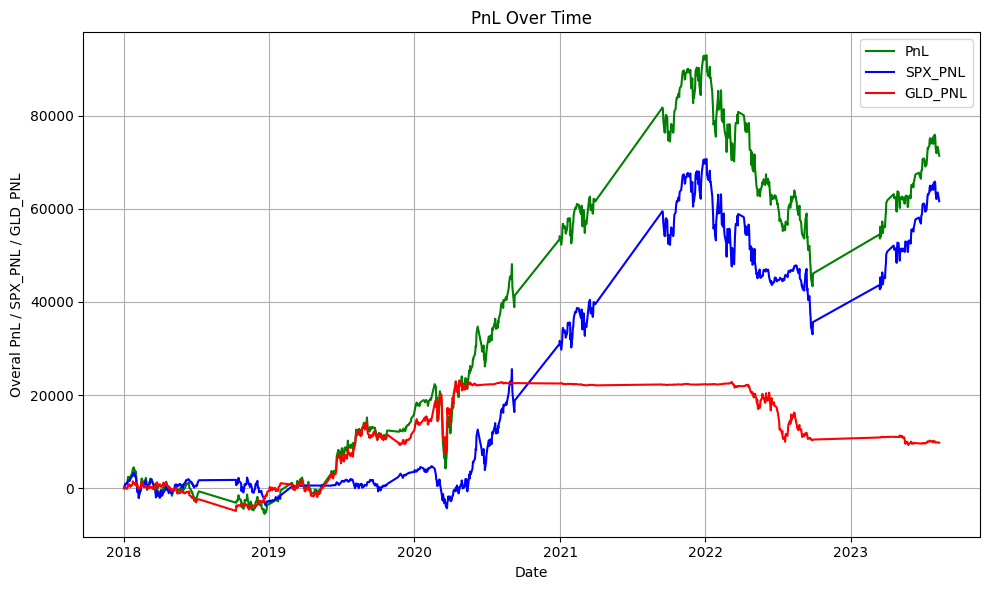

In [ ]:
strategy.plot_pnl()

In [ ]:
transactions = strategy.get_transactions()
print("Total number of transactions is",len(transactions))

Total number of transactions is 628


In [ ]:
transactions.head()

,Date,Symbol,Signal,Price,Qty
0,2018-01-02,SPX,1,268.769989,186.0
1,2018-01-02,GLD,1,125.150002,399.0
2,2018-11-23,SPX,-1,263.250000,10.0
3,2018-11-23,GLD,1,115.769997,20.0
4,2018-11-26,SPX,-1,267.500000,10.0


## **Overal Performance**

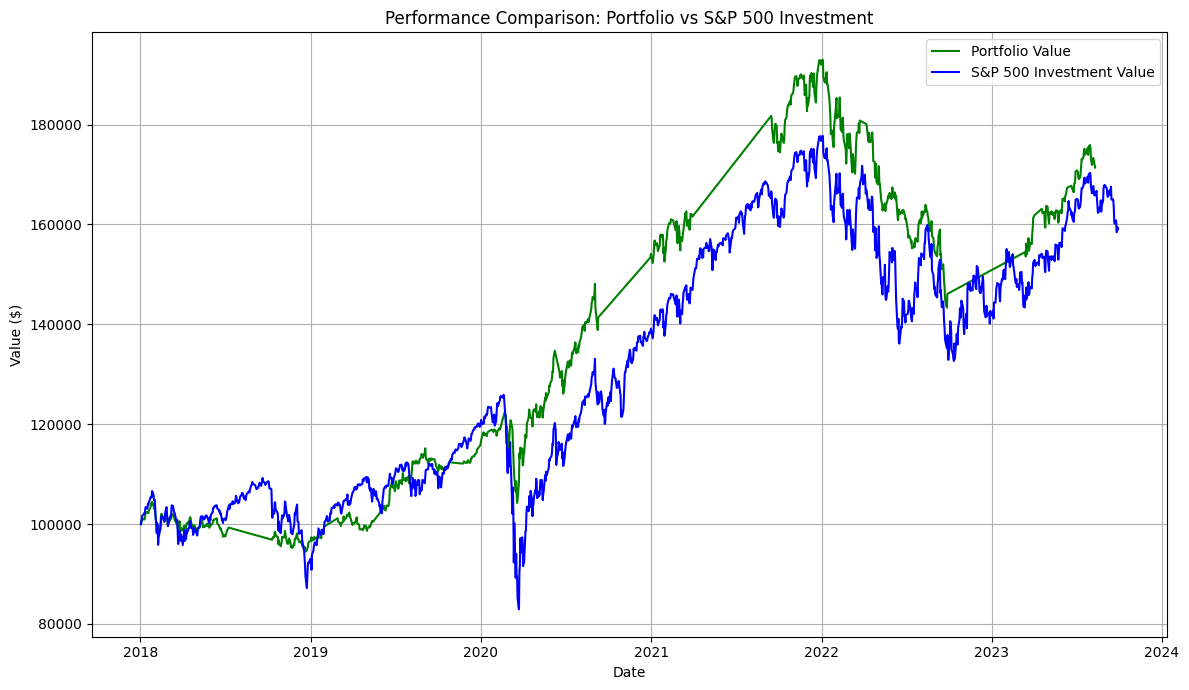

In [ ]:
strategy.plot_performance_vs_sp500(spx_order_book_df)

In [ ]:
end_pnl = current_position.iloc[-1][3]
print(f"The total profit on the portfolio between 01/01/2018 and 30/08/2023 amounts to ${round(end_pnl)}")

The total profit on the portfolio between 01/01/2018 and 30/08/2023 amounts to $73330


In [ ]:
return_spx = (spx_order_book_df.iloc[-1,1] - spx_order_book_df.iloc[0,1])/spx_order_book_df.iloc[0,1]*100
print(f"The overal return on the S&P500 between 01/01/2018 and 30/08/2023 is equal to {round(return_spx)}%")

The overal return on the S&P500 between 01/01/2018 and 30/08/2023 is equal to 59%


In [ ]:
return_portfolio = ((end_pnl+initial_cash) - initial_cash)/initial_cash*100
print(f"The overal return on the proposed portfolio between 01/01/2018 and 30/08/2023 is equal to {round(return_portfolio)}%")

The overal return on the proposed portfolio between 01/01/2018 and 30/08/2023 is equal to 73%


In [ ]:
print(f"This means our portfolio outperforms the S&P500 by {round(return_portfolio-return_spx)} percentage points")

This means our portfolio outperforms the S&P500 by 14 percentage points


**Volatility indicators**

In [ ]:
strategy = TradingStrategy(initial_cash, spx_order_book_df, gld_order_book_df)
strategy.execute_trades(spx_order_book_df, gld_order_book_df)
avg_return, volatility = strategy.compute_statistics()

print(f"Average Daily Return: {avg_return * 100:.2f}%")
print(f"Standard Deviation (Volatility) of Daily Return: {volatility * 100:.2f}%")


Average Daily Return: 0.06%
Standard Deviation (Volatility) of Daily Return: 1.04%
